# 1. RNN (Recurrent Neural Network)
## 1-1. Sequence data?
- 순서에 의미가 있고, 순서가 달라질 경우 의미가 손상되는 데이터
  - Sequence Data
  - Temporal Sequence Data: 순서가 시간의 흐름을 나타내는 경우
  - Time Series: 시간적 순차 데이터 중, 일정 시간 간격으로 기록되는 경우
- 예시
  1. 음성 및 오디오
  2. 자연어
  3. 생물학 서열
  4. 비디오
### 기존 정형 데이터와의 차이점
- 정형 테이터: 샘플(행), 특성(열)의 독립성
- 순차 데이터: 순서 의존성, 자기 상관성(이전 시점이 다음 시점에 영향 줌.)
> 머신러닝의 한계, 과거를 기억할 수 있는 신경망이 필요하다.

## 1-2. RNN의 구조와 원리
### RNN(Recurrent Neural Network)의 정의
- 순환 구조를 가진 순차 데이터 처리에 특화된 NN
1. squence data의 순서 정보를 유지하며 처리
2. 순환 은닉층이 매 시점의 은닉 상태를 업데이트
  - hidden layer: 함수
  - hiddon state: 벡터
3. 이전 시점 값을 현재 시점으로 넘겨준다.

### RNN의 구조
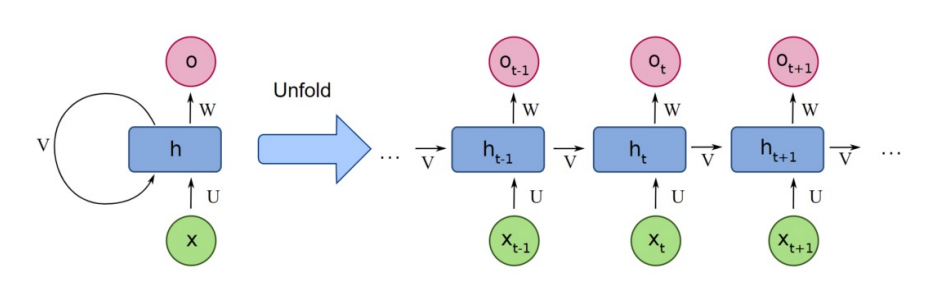
- $x_t$: input
- $h_t$: Hidden State
- $o_t$: output
- $U$: input weight, $x_t$이 $h_t$에 영향 주는 가중치. 현재 정보 처리
- $V$: recurrent weight, $h_t$가 $o_t$에 영향 주는 가중치
- 기존 NN과 차이는 V의 유무이다.
  - 기존: 입력층에서 은닉층을 거쳐 바로 출력층
  - RNN: V를 통해 이전 정보를 전달.

### RNN 아키텍쳐
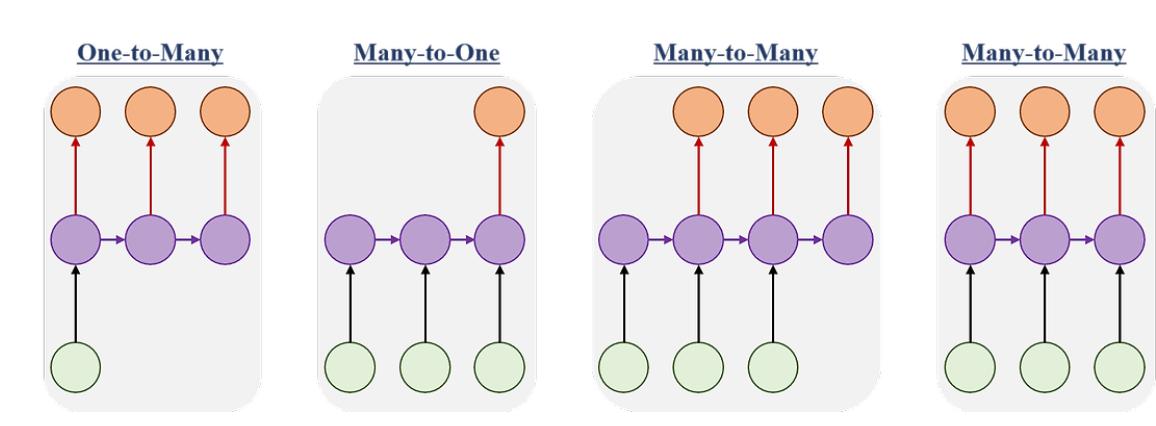
1. One to One: Vanilla RNN, 간단한 기계학습
2. One to Many: 이미지 캡셔닝
3. Many to One: 감정 분석, 스팸 분류, 시계열 예측
4. Many to Many(3): 기계 번역
5. Many to Many(4): video recognition

### RNN의 핵심 원리: 가중치 공유
- 같은 가중치를 다양한 시점에서 반복 적용
- 데이터 길이와 시점에 관계없이 효과적으로 작동할 수 있게 함.
- U, W, b를 공유하는 구조이다.
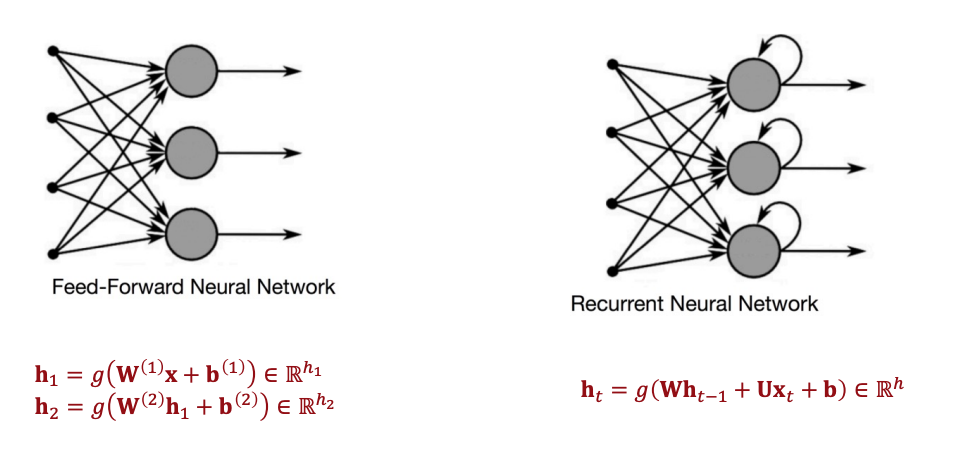

#### 이점
1. 학습 parameter 수 감소
    - 입력 길이가 길어져도 학습 파라미터 수가 일정하게 유지된다.
2. 일반화 능력 향상
    - 이전부터 현재까지의 입력이 주어졌을 때, 어떻게 메모리를 업데이트 할 것인가 하는 일반적 규칙을 학습한다.
    - 새로운 길이의 sequence나 다양한 패턴에도 유연한 대응 가능
- 이전 데이터의 패턴/흐름에 이어 현재의 데이터가 들어왔을 때 어떻게 판단/수정할 것인지 학습.

## 1-3. RNN의 한계 및 장기 의존성 문제(The Long-Term Dependency Problem)

- 전체 sequence를 모두 읽은 후 역전파
  - 역전파 과정에서 chain rule에 의해 미분값이 반복적으로 곱해짐.

$$\frac{\partial h_t}{\partial h_{t-1}} = \underbrace{\text{diag}\left(g'(a_t)\right)}_{\text{활성화 함수 미분값}} \ \times\underbrace{W_{hh}}_{\text{순환 가중치}}$$
- $\text{diag}(g'(a_t))$: 각 뉴런의 미분값을 대각행렬로 표현, hidden uint이 독립적으로 작용한다.
- $W_hh$: hidden state 간 정보 전달에서 사용되는 가중치

### RNN의 한계점
1. 기울기 소실(vanishing gradients)
    - 역전파 과정에서 기울기 크기가 1보다 작을 때 0으로 수렴하게 됨.
2. 기울기 폭주(exploding gradients)
    - 역전파 중 시퀀스 뒤쪽 오차가 비정상적으로 커지는 문제. 기울기가 무한대로 발산하게 됨. threshold를 정해 발산을 피할 수 있다.
3. 느리다.
    - 계산이 순차적으로 이뤄져야 해서 병렬적으로 처리할 수 없음(CNN은 병렬 가능).
4. 장기 의존성 문제
    - 시퀀스 앞 부분의 정보를 잊어 맥락 파악 능력이 급격히 저하됨.
    - 단기 기억력은 준수하나 장기가 안 좋음.
> RNN 기억력 한계를 극복할 수 있고 안정적인 모델이 필요하다.

# 2. LSTM & GRU
## 2-1. Gate로 정보의 흐름을 제어하는 LSTM
### LSTM(Long Short Term Memory)
- RNN의 기울기 소실을 해결하기 위한 구조
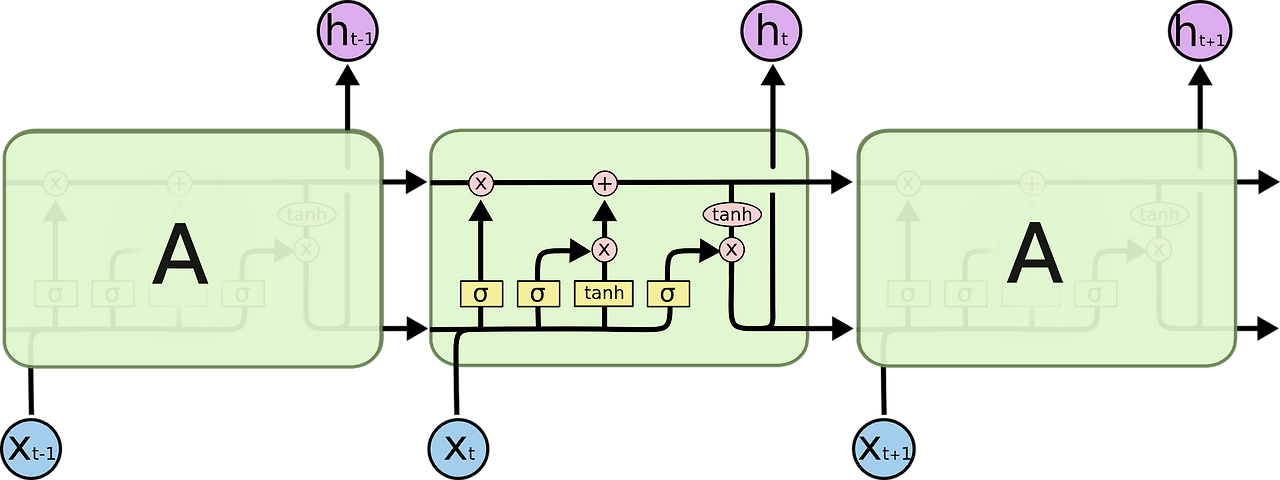
1. 기억할 내용과 잊어버릴 내용을 선택한다: GATE로 곱셈을 덧셈으로 바꾼다.
2. RNN과 차이: $c_t$, $h_t$로 순환되는 층을 2개 사용한다.
    - $c_t$: cell state, 장기
    - $h_t$: hidden state, 단기
3. Gate를 지나 필요한 정보들만 통과
    - Forget gate: 얼마나 잊어버릴지
    - Input gate: 얼마나 사용할지
    - Output gate: 다음 층으로 어떤 정보를 전달할지
4. Final memory cell: forget + input > 현재 정보를 얼마나 기억할지

`+` Vanishing gradient problen 완화
- 이전 정보가 중요하게 판단되면, 보존되는 상태로 hiden state를 갱신할 수 있어서<br>

`-` 복잡하다. RNN보다 학습 파라미터 많아짐.

## 2-2. GRU
### GRU(Gated Recurrent Uints)
- 메모리 셀 없이 게이트 수를 줄여 구조 간소화
- Update gate < Forget gate + Input gate
- Reset gate 도입
- gate를 3개에서 2개로 줄임 > 학습 시간은 줄고, 성능은 LSTM 이상이다.

`+` 성능과 효율성 사이 균형이 좋음.<br>
`-` 긴 시퀀스 처리 한계는 여전히 존재

## 2-3. LSTM vs GRU
상황에 맞게 선택하는 게 중요하다.

- LSTM 적합한 경우
  - 긴 시퀀스, 문맥 이해 중요
  - 데이터 양 충분, 복잡한 패턴
  - 성능이 효율보다 중요할 때
  - 기계 번역, 언어 모델링, 장기 시계열
- GRU 적합한 경우
  - 자원 제한, 학습 속도 중요
  - 데이터 양 불충분, 과적합 위험 있는 경우
  - 실시간

# 3. Seq2Seq: 문장 입력, 문장 출력
1. 입력, 출력의 길이가 달라도 된다.
2. Encoder, Decoder가 분리되어 있다.
3. 문맥 벡터(context vector)

## 3-1. Seq2Seq의 기본 구조
### Seq2Seq2
- 한 시퀀스를 다른 시퀀스로 변환, 주로 기계번역
- 입출력 개수가 달라도 된다.
- Encoder-Decoder 모델이라고 불리기도.

### Encoder와 Decoder
1. Encoder
    - 입력 시퀀스를 압축하여 디코더에게 넘겨줄 문맥 준비 
      - 압축 정보를 context vector라 함.
    - t의 임베딩 단어 입력 + t-1의 hidden state가 RNN/LSTM의 입력으로 주어지고, t의 hidden state가 나온다.
2. Decoder
    - context vector 바탕으로 원하는 시퀀스 생성.
    - 디코더의 첫 번째 hidden state에 context vector가 사용됨.
    - t의 output이 t+1의 input으로 넘어감.
- 인코더, 디코더 모두 RNN/LSTM/GRU를 여러 개 조합한 형태이다.
- 모든 단어는 word embedding 과정(word2vec)을 거친다.

### Context Vector
- float 자료형의 vector 형태로, Encoder 중 마지막 시점의 hidden state를 의미함.
- input sentence의 요약 정보처럼 작동함.
- 차원을 직접 설정할 수 있다.

##### 전체 흐름 설명
- t-1의 단어, t의 단어를 기억하여 정보를 쌓는다.
- 마지막 단어 입력 후 생긴 hidden state가 context vector다.
- 이를 input에 대한 요약으로 Decoder에 전달한다.
- hidden state의 값이 계속 다음 시점으로 넘어가면서 과거 정보를 반영할 수 있다.

## 3-2. Seq2Seq의 한계: 병목 현상(Bottleneck)
- LSTM의 동일 입출력 크기 제약을 해결했지만 아직 한계가 있다.
- 고정된 Context Vector에 문장의 정보를 압축하다 보니 Bottleneck이 생긴다.
  - 고정된 길이에 input의 모든 정보를 담지 못하고 손실
- 길수록 손실이 크다.
- 기울기 소실 문제가 아직 있음.
- 병렬화 불가능: 순차 처리 메커니즘.
> Attention 도입

## 세 줄 요약
1. RNN: 순차 데이터를 처리하기 위해 과거를 기억하나, 길어질수록 앞 내용을 까먹어 장기 의존성 문제 발생.
2. LSTM/GRU: Gate를 사용해 필요 정보 오래 기억. 불필요 정보는 잊음.
3. Seq2Seq: 문장 입력, 문장 출력으로 encoder-decoder 구조이다. 긴 문장의 모든 정보를 하나의 context vector로 압축하기 때문에 정보가 손실되는 Bottleneck 발생 ㅠ